## Download Datasets

In [38]:
!gdown 1lN8LdQjy-L_0UJt359I_cuZkOLl0qDx0

Downloading...
From: https://drive.google.com/uc?id=1lN8LdQjy-L_0UJt359I_cuZkOLl0qDx0
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 14.7MB/s]


In [39]:
!gdown 1AF9ahO_3AWgikqoME0tlMFfhp5XEPU0H

Downloading...
From: https://drive.google.com/uc?id=1AF9ahO_3AWgikqoME0tlMFfhp5XEPU0H
To: /content/BTC-Daily.csv
100% 257k/257k [00:00<00:00, 117MB/s]


# Advertising

## Preprocess Data

In [40]:
import numpy as np
from numpy import genfromtxt

# dataset
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Normalize input data by using mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)


## Functions for training

### SGD

In [41]:
import numpy as np

def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []

    N = X_b.shape[0]  # N should be defined before using in the loop

    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np.random.randint(N) # In real application, you should use this code
            random_index = i  # This code is used for this assignment only
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # Compute output
            prediction = xi @ thetas

            # Compute loss
            loss = prediction - yi

            # Compute gradient for loss
            gradient = xi.T @ loss

            # Update theta
            thetas -= learning_rate * gradient

            # Log losses and thetas path
            losses.append(np.sum(loss**2) / 2)
            thetas_path.append(thetas.copy())

    return thetas_path, losses


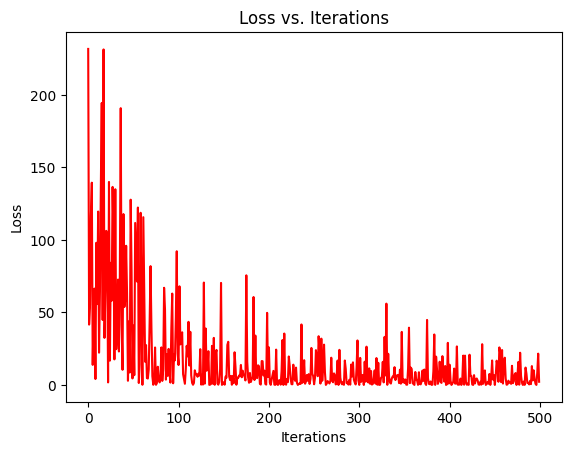

In [42]:
import matplotlib.pyplot as plt

# Run stochastic gradient descent
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)

# Plot the loss for the first 500 iterations
x_axis = list(range(500))

plt.plot(x_axis, losses[:500], color="r")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()


In [43]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

6754.643359356192


### Mini-Batch GD

In [44]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []

    N = X_b.shape[0]  # Ensure N is defined for later use

    for epoch in range(n_epochs):

        # shuffled_indices = np.random.permutation(N) # uncomment this code for real application
        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3,
                                       132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16,
                                       185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126,
                                       165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190,
                                       169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131,
                                       77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139,
                                       195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147,
                                       92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47,
                                       174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67,
                                       129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24,
                                       168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55,
                                       133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122,
                                       154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i + minibatch_size]
            yi = y_shuffled[i:i + minibatch_size]

            # Compute output
            prediction = xi @ thetas

            # Compute loss
            # loss = np.mean((prediction - yi) ** 2)
            loss = (prediction - yi) ** 2 / 2

            # Compute derivative of loss
            loss_gradient = prediction - yi

            # Compute derivative of parameters
            gradients = (1 / minibatch_size) * xi.T @ loss_gradient

            # Update parameters
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses


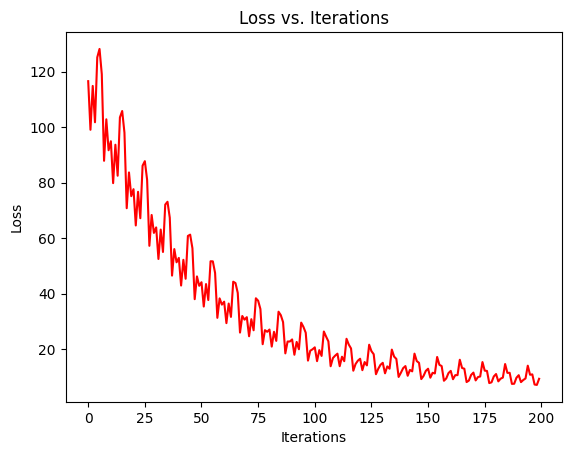

In [45]:
import matplotlib.pyplot as plt

# Run mini-batch gradient descent
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

# Plot the loss for the first 200 iterations
x_axis = list(range(200))

plt.plot(x_axis, losses[:200], color="r")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()


In [46]:
# Run mini-batch gradient descent
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

# Print the rounded sum of losses
print(round(sum(losses), 2))


8865.65


## Batch GD

In [47]:
import numpy as np

def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    # Uncomment this line for real application
    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []

    N = X_b.shape[0]  # Ensure N is defined for later use

    for i in range(n_epochs):
        # Compute output
        prediction = X_b @ thetas

        # Compute loss
        loss = np.mean((prediction - y) ** 2)

        # Compute loss’s derivative
        loss_gradient = prediction - y

        # Compute parameters’ derivative
        gradients = (2 / N) * X_b.T @ loss_gradient

        # Update parameters
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

        # Store mean loss
        losses.append(loss)

    return thetas_path, losses


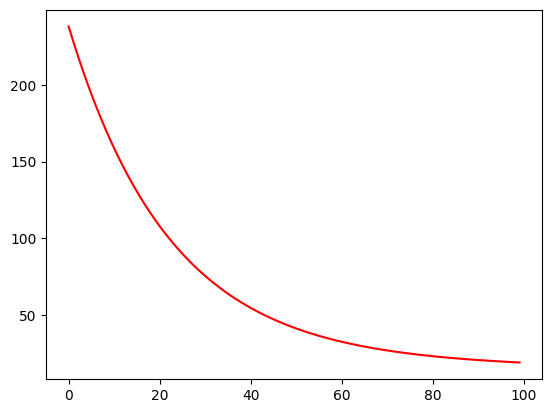

In [48]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color="r")
plt.show()


In [49]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
print(round(np.sum(losses), 2))


6716.46


# Bitcoin forecasting

## Preprocess Data

In [50]:
import pandas as pd

df = pd.read_csv('./BTC-Daily.csv')
df = df.drop_duplicates()

df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


2014-11-28 to 2022-03-01


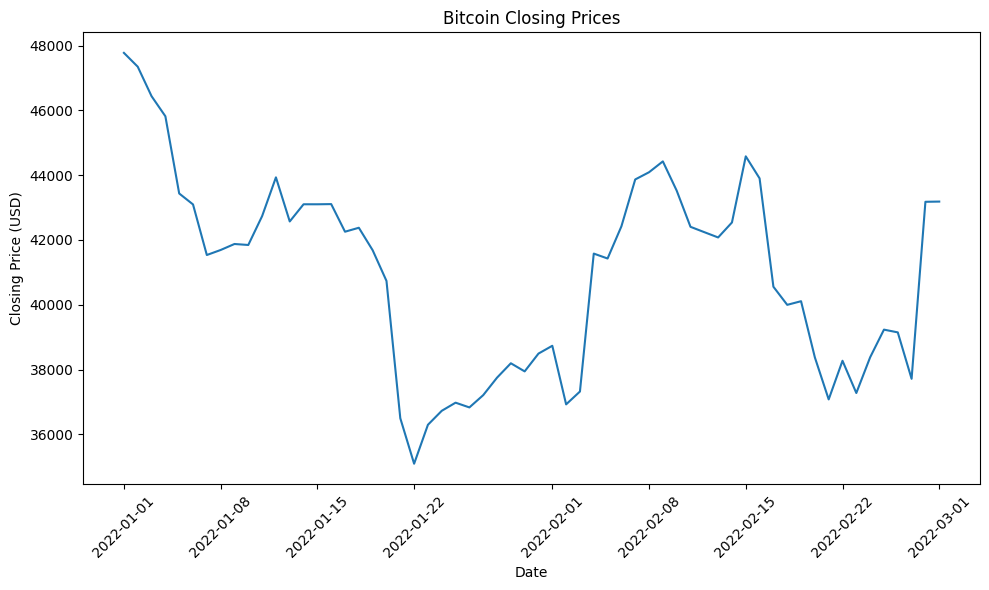

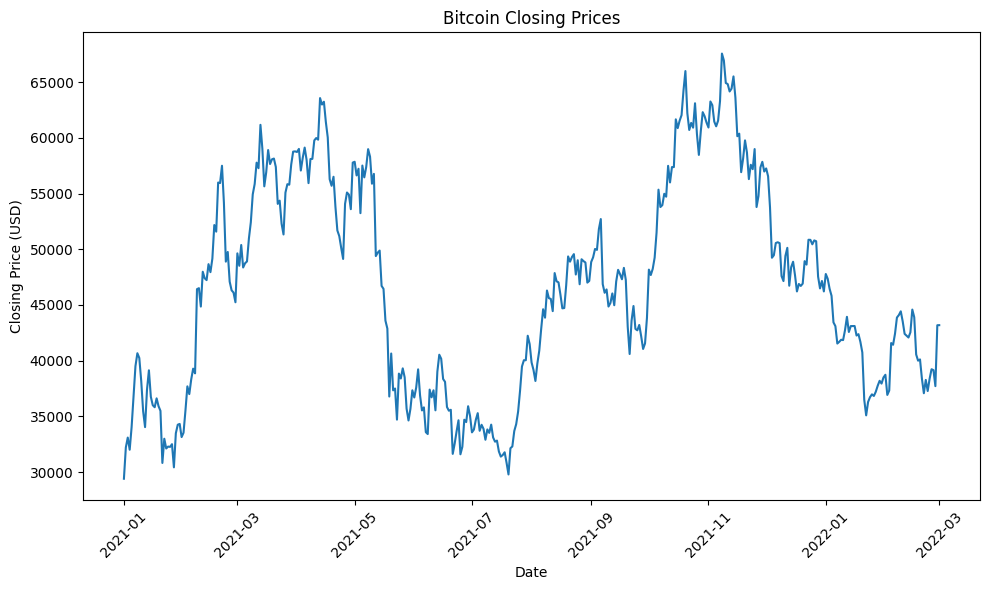

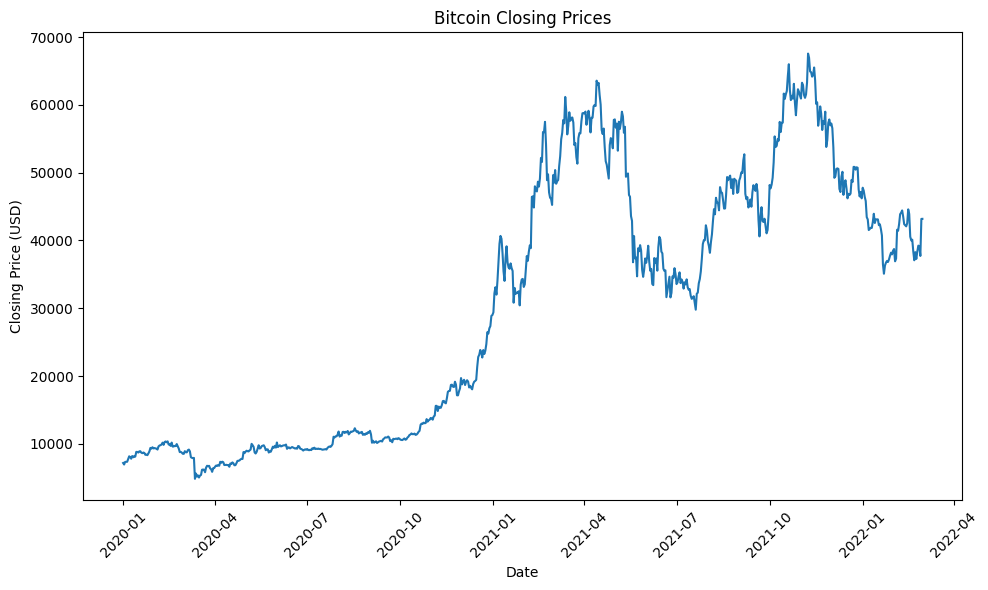

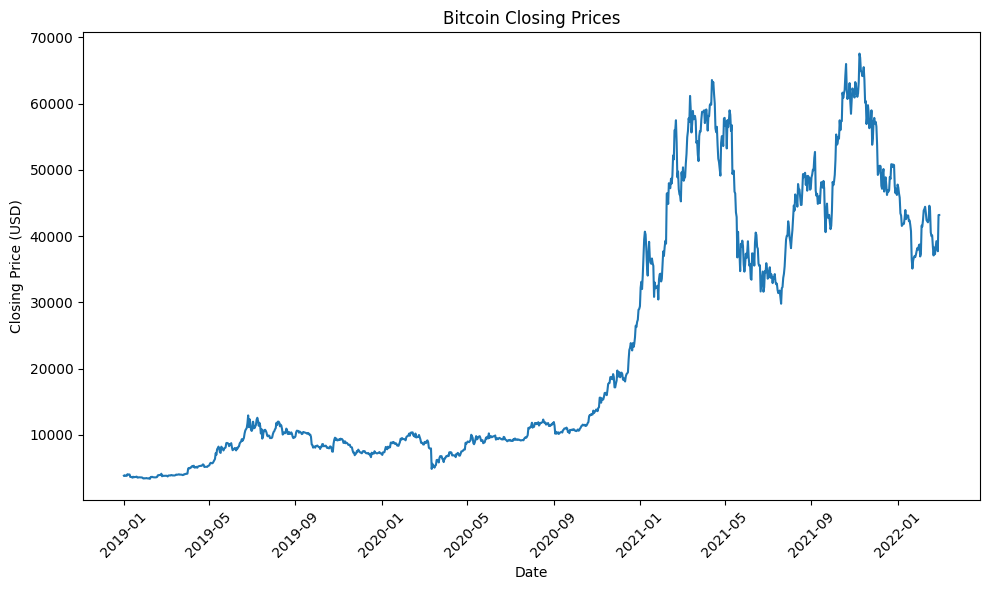

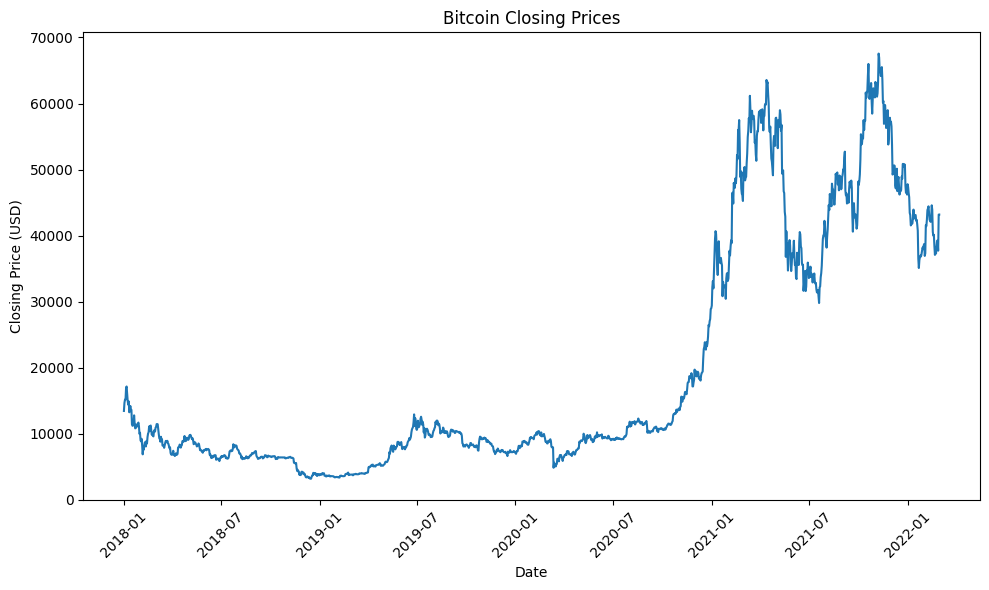

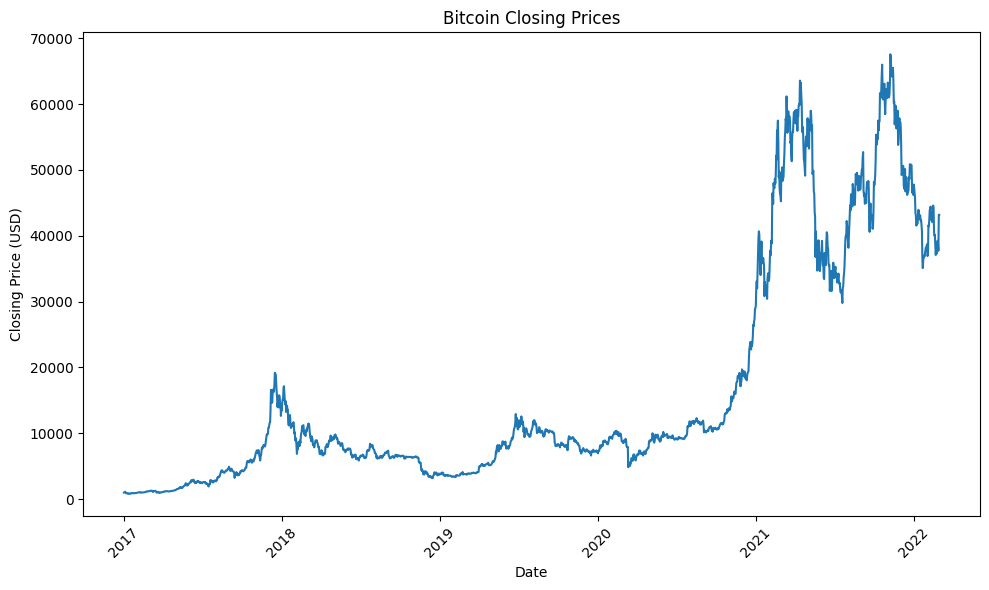

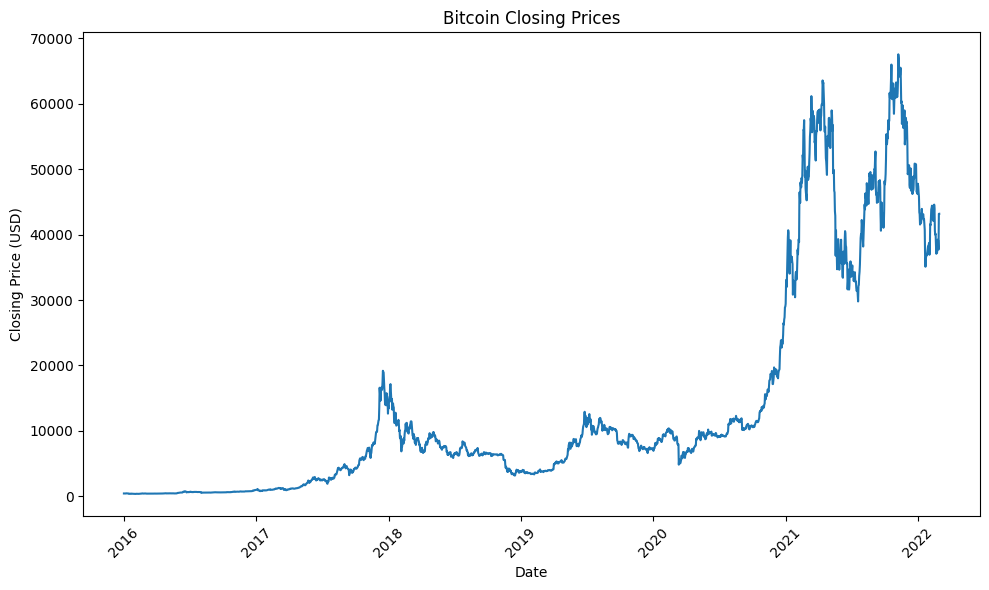

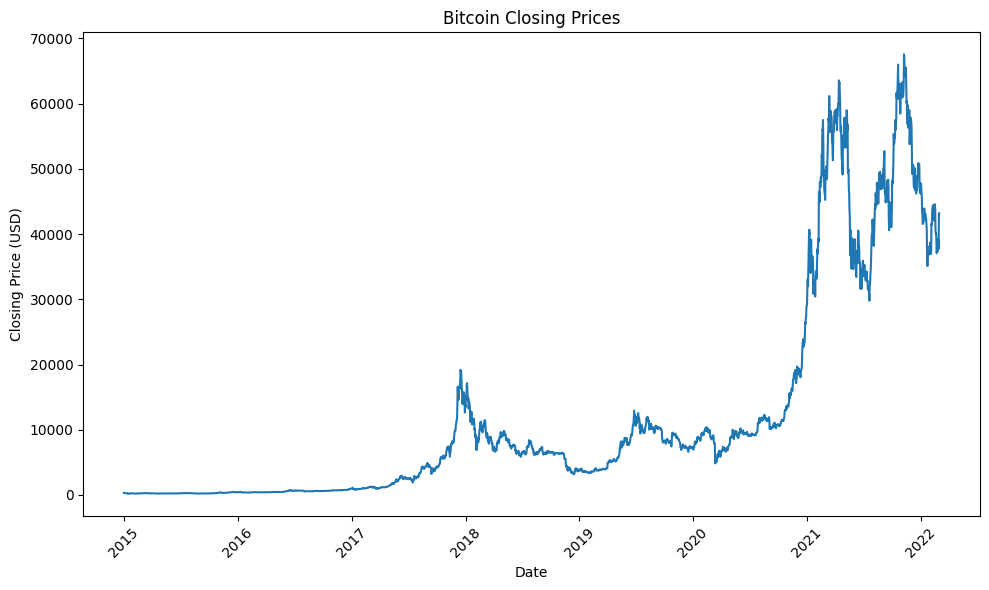

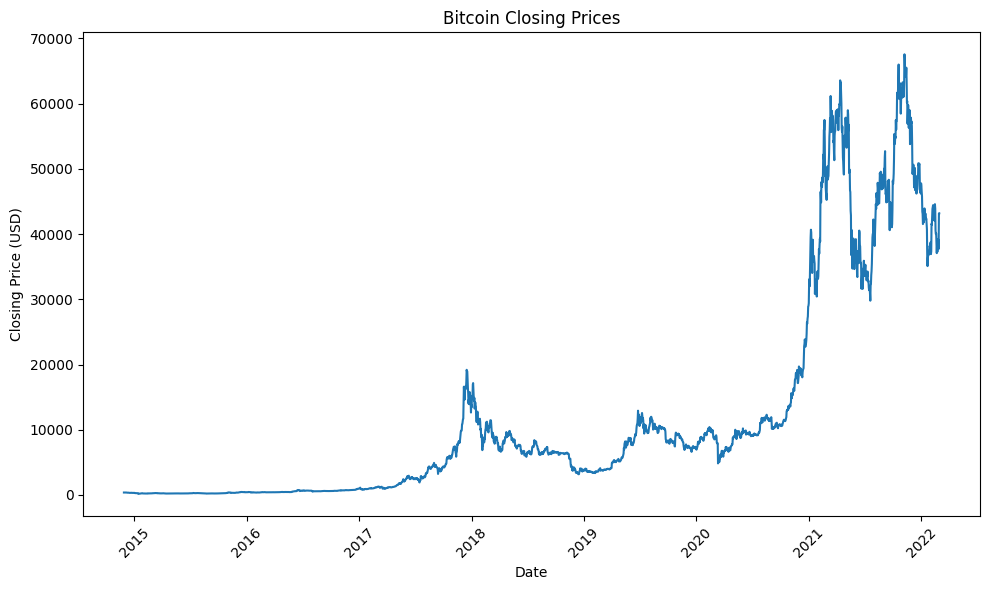

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./BTC-Daily.csv')
df = df.drop_duplicates()

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day into separate columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Range of dates covered
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

# Get unique years
unique_years = df['date'].dt.year.unique()

# Create an empty list to store new rows
new_rows = []

# Populate new_rows with all combinations of year, month, day
for year in unique_years:
    # Filter for the current year
    year_data = df[df['date'].dt.year == year]
    months = year_data['date'].dt.month.unique()
    for month in months:
        days = year_data[year_data['date'].dt.month == month]['date'].dt.day.unique()
        for day in days:
            # Append the new row as a dictionary to the list
            new_rows.append({'year': year, 'month': month, 'day': day})

    # Create a DataFrame from the list of new rows
    year_month_day = pd.DataFrame(new_rows)

    # Merge the data using the new columns in df
    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')

    # Plot
    plt.figure(figsize=(10, 6))
    # Use the original date column for plotting
    plt.plot(merged_data['date'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices') # Remove year-specific title
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [52]:
!pip install mplfinance

<ipython-input-53-48ae0d77024b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


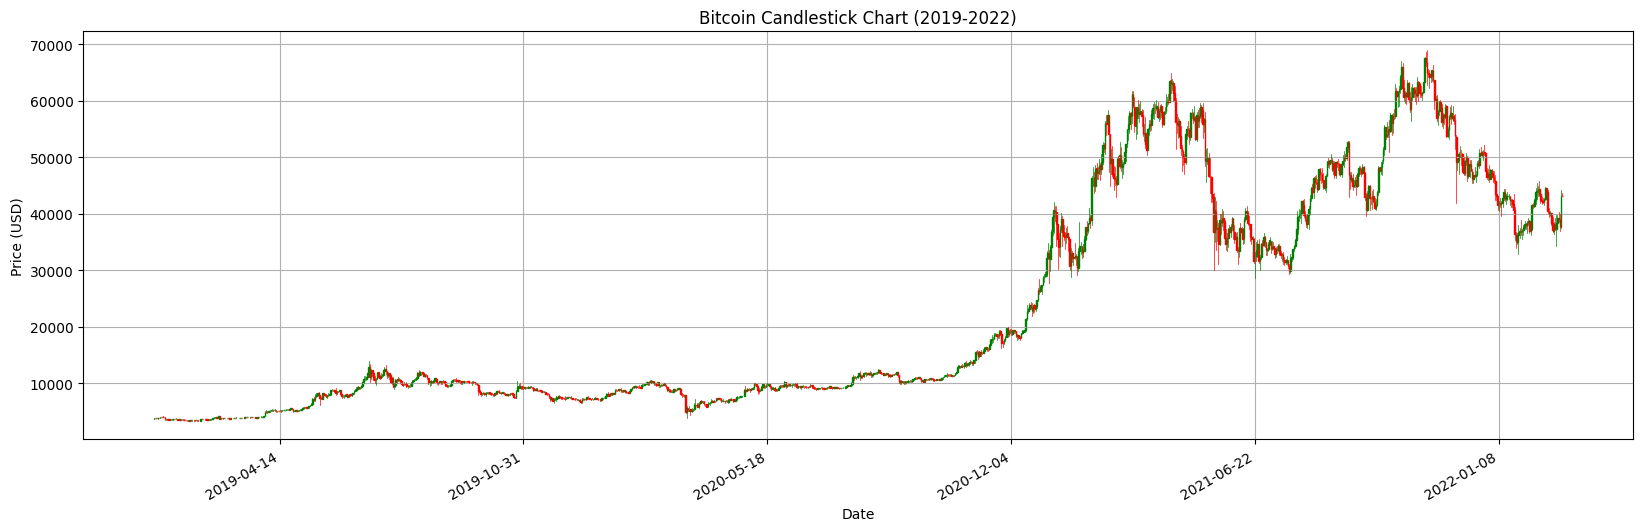

In [53]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values,
                 width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')
plt.show()


In [54]:
def predict(X, w, b):
    return X.dot(w) + b

def gradient(y_hat, y, x):
    loss = y_hat - y
    dw = x.T.dot(loss) / len(y)
    db = np.sum(loss) / len(y)
    cost = np.sum(loss ** 2) / (2 * len(y))
    return (dw, db, cost)

def update_weight(w, b, lr, dw, db):
    w_new = w - lr * dw
    b_new = b - lr * db
    return (w_new, b_new)

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[['open', 'high', 'low']]  # Các đặc trưng
y = df[['close']]  # Giá thực tế

print(y)
# Giả sử bạn đã có dữ liệu X và y
scalar = StandardScaler()

# Chuẩn hóa dữ liệu
X = scalar.fit_transform(X)
y = scalar.fit_transform(y)
y = y.ravel()

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                      random_state=42, shuffle=True)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

         close
0     43185.48
1     43178.98
2     37712.68
3     39146.66
4     39231.64
...        ...
2646    379.25
2647    378.39
2648    373.34
2649    376.72
2650    376.28

[2651 rows x 1 columns]
X_train shape: (1855, 3)
y_train shape: (1855,)


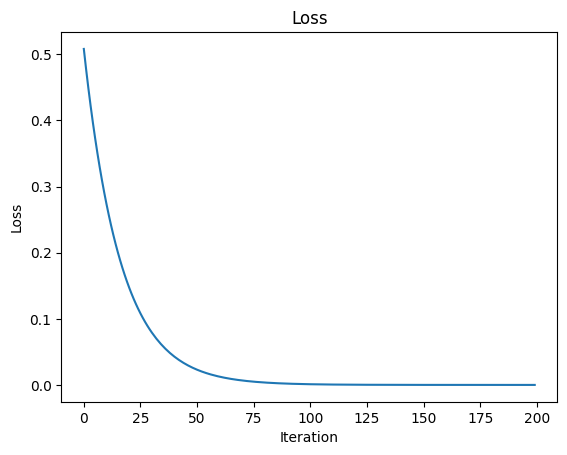

In [71]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights with the correct size
    b = 0  # Initialize bias
    losses = []

    for _ in range(num_iterations):
        # Dự đoán
        y_hat = predict(X, w, b)

        # Tính toán gradient và chi phí
        dw, db, cost = gradient(y_hat, y, X)
        losses.append(cost)

        # Cập nhật trọng số và bias
        w, b = update_weight(w, b, learning_rate, dw, db)

    return w, b, losses

w, b, losses = linear_regression_vectorized(X_train, y_train,
                                            learning_rate=0.01, num_iterations=200)

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

In [72]:
from sklearn.metrics import r2_score

# Dự đoán trên tập kiểm tra
y_pred = predict(X_test, w, b)

# Tính RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Tính MAE
mae = np.mean(np.abs(y_pred - y_test))

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Dự đoán trên tập huấn luyện
y_train_pred = predict(X_train, w, b)  # Sửa từ y-train_pred thành y_train_pred

# Tính R-squared trên dữ liệu huấn luyện
train_accuracy = r2_score(y_train, y_train_pred)

# Tính R-squared trên dữ liệu kiểm tra
test_accuracy = r2_score(y_test, y_pred)

# In kết quả
print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))


Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


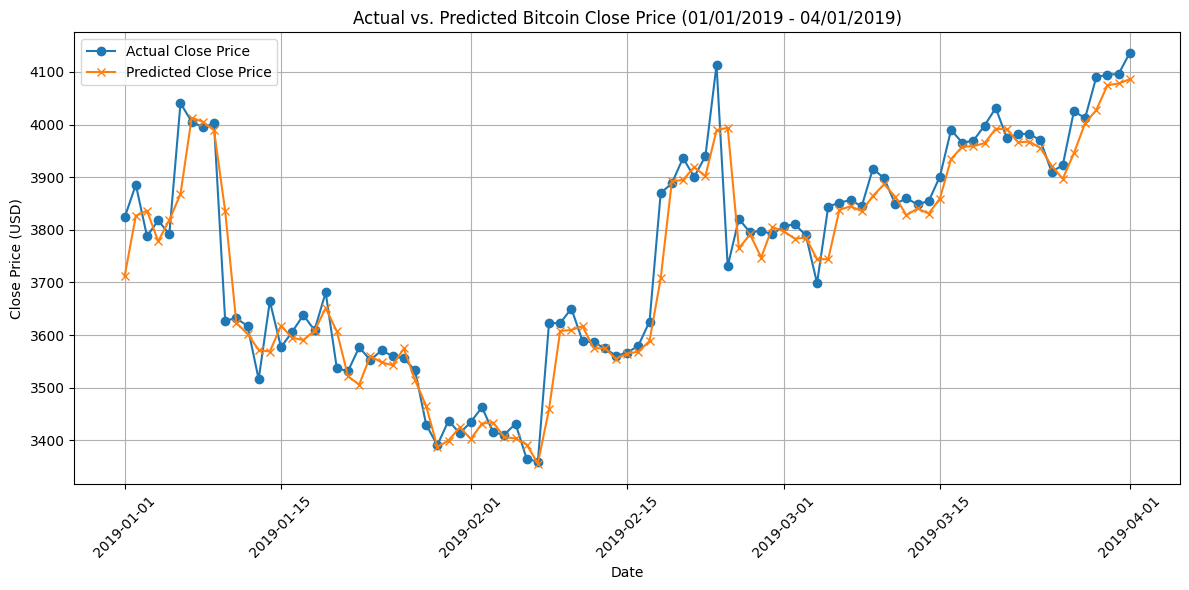

In [74]:
# Filter data for 2019-01-01 to 2019-04-01
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# Prepare X and y for prediction
X_2019_q1 = df_2019_q1[["open", "high", "low"]]
y_2019_q1_actual = df_2019_q1["close"]

# Make predictions
y_2019_q1_pred = predict(X_2019_q1, w, b)

# Create the plot
plt.figure(figsize=(12, 6))

plt.plot(df_2019_q1['date'], y_2019_q1_actual, label='Actual Close Price', marker='o')
plt.plot(df_2019_q1['date'], y_2019_q1_pred, label='Predicted Close Price', marker='x')

plt.title('Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 04/01/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
